# Pre-trained Models
## with HuggingFace Diffusers

<img src="https://raw.githubusercontent.com/huggingface/diffusers/77aadfee6a891ab9fcfb780f87c693f7a5beeb8e/docs/source/imgs/diffusers_library.jpg" width="300"/>

[HuggingFace Diffusers](https://huggingface.co/docs/diffusers/index)

Available pipelines/tasks: [Diffusers Summary table](https://huggingface.co/docs/diffusers/api/pipelines/overview#diffusers-summary)

Based on HuggingFace Diffusers [examples](https://huggingface.co/docs/diffusers/quicktour).

In [2]:
# Additional requirements
# !conda install diffusers --yes
# !pip install --upgrade accelerate

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
import IPython.display as ipd

from diffusers import DiffusionPipeline

## Image generation

In [5]:
model_id = "runwayml/stable-diffusion-v1-5"

pipeline = DiffusionPipeline.from_pretrained(model_id, use_safetensors=True)
#pipeline = pipeline.to("cuda")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [6]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.18.2",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [7]:
image = pipeline("An image of a squirrel in Picasso style").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


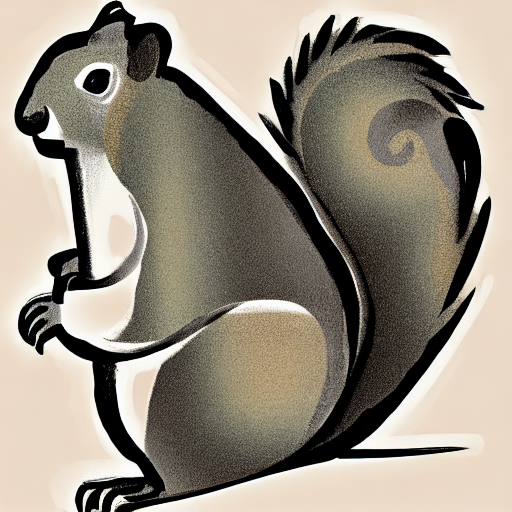

In [8]:
image

## Music generation (unconditional)

In [9]:
model_id = "harmonai/maestro-150k"

pipeline = DiffusionPipeline.from_pretrained(model_id)
#pipeline = pipeline.to("cuda")

unet/diffusion_pytorch_model.safetensors not found


In [10]:
audios = pipeline(audio_length_in_s=4.0).audios

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
# To save locally
#from scipy.io.wavfile import write
#for i, audio in enumerate(audios):
#    write(f"maestro_test_{i}.wav", pipeline.unet.config.sample_rate, audio.transpose())

for audio in audios:
    display(ipd.Audio(audio, rate=pipeline.unet.config.sample_rate))